In [16]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
df = pd.read_csv('./data/ice-cream-selling.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (°C)         49 non-null     float64
 1   Ice Cream Sales (units)  49 non-null     float64
dtypes: float64(2)
memory usage: 912.0 bytes


In [18]:
df = df.rename(columns={
    "Temperature (°C)": "Temperature",
    "Ice Cream Sales (units)": "IceCreamSales"
})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    49 non-null     float64
 1   IceCreamSales  49 non-null     float64
dtypes: float64(2)
memory usage: 912.0 bytes


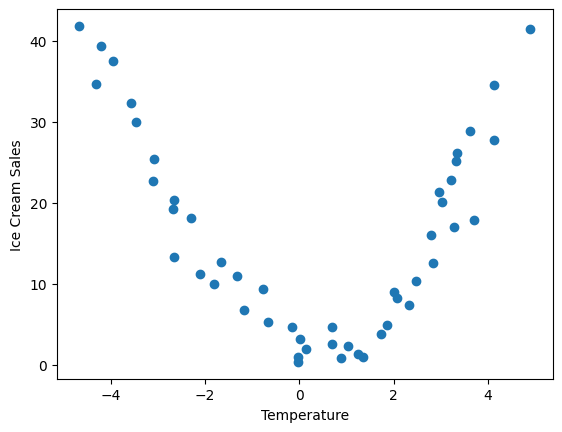

In [19]:
plt.scatter(df['Temperature'], df['IceCreamSales'])
plt.xlabel('Temperature')
plt.ylabel('Ice Cream Sales')
plt.show()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['Temperature']], df['IceCreamSales'], test_size=0.2, random_state=42
)

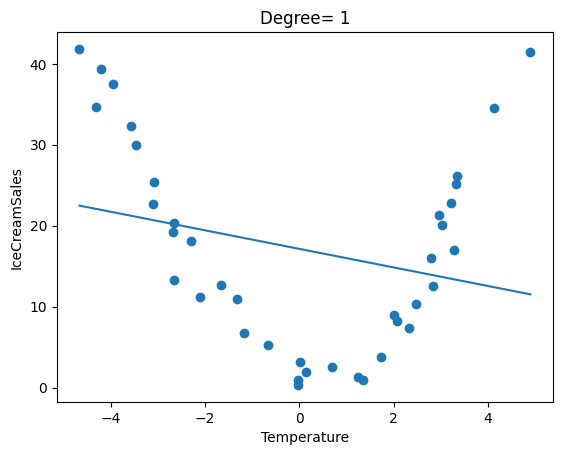

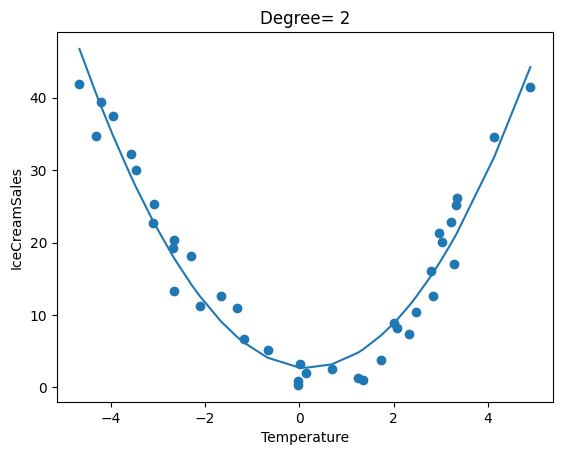

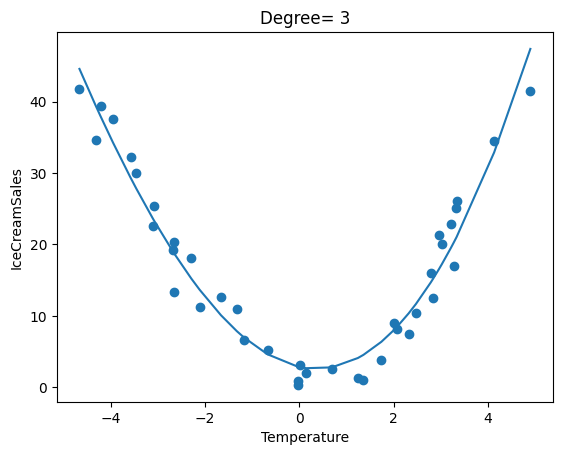

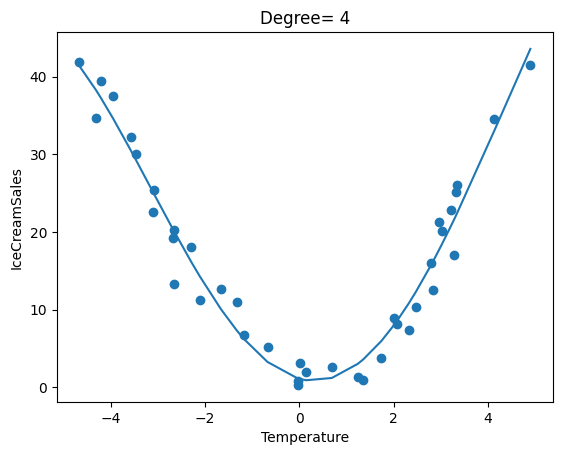

In [21]:
for d in [1, 2, 3, 4]:
    pipeline = Pipeline([('pipeline_features', PolynomialFeatures(degree=d)), ('linear_regression', LinearRegression())])
    pipeline.fit(X_train, y_train)
    y_predict = pipeline.predict(X_test)
    MSE = mean_squared_error(y_test, y_predict)
    
    y_pred_train = pipeline.predict(X_train)

    fig, ax = plt.subplots()
    ax.set_xlabel('Temperature')
    ax.set_ylabel('IceCreamSales')

    ax.set_title("Degree= " + str(d))
    order = np.argsort(X_train.values.flatten())

    ax.scatter(X_train, y_train)
    ax.plot(X_train.values.flatten()[order], y_pred_train[order])
    plt.show()

In [23]:
r2_score(y_train, y_pred_train)

0.9590068634754769